In [125]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import BikeShareDS
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# load the dataset
b = BikeShareDS.BikeShareDS()

In [71]:
# display first 5 records
display(b.hour_ds.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,jan,0,0,sat,0,clear,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,jan,1,0,sat,0,clear,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,jan,2,0,sat,0,clear,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,jan,3,0,sat,0,clear,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,jan,4,0,sat,0,clear,3.28,3.0014,75.0,0.0,0,1,1


In [72]:
# display dataset shape
display(b.hour_ds.shape)

(17379, 17)

In [73]:
# display fields with types
display(b.hour_ds.dtypes)

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [74]:
# display statistics
display(b.hour_ds.describe())

,instant,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.028770,0.682721,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,0.500008,6.914405,0.167165,0.465431,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,2011.000000,0.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,6.000000,0.000000,0.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,12.000000,0.000000,1.000000,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,18.000000,0.000000,1.000000,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [81]:
# find missing values in the dataset
display(b.hour_ds.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [82]:
# find duplicates in the dataset
display(b.hour_ds.duplicated().sum())

0

Text(0.5, 1.0, 'Hourly rental trend')

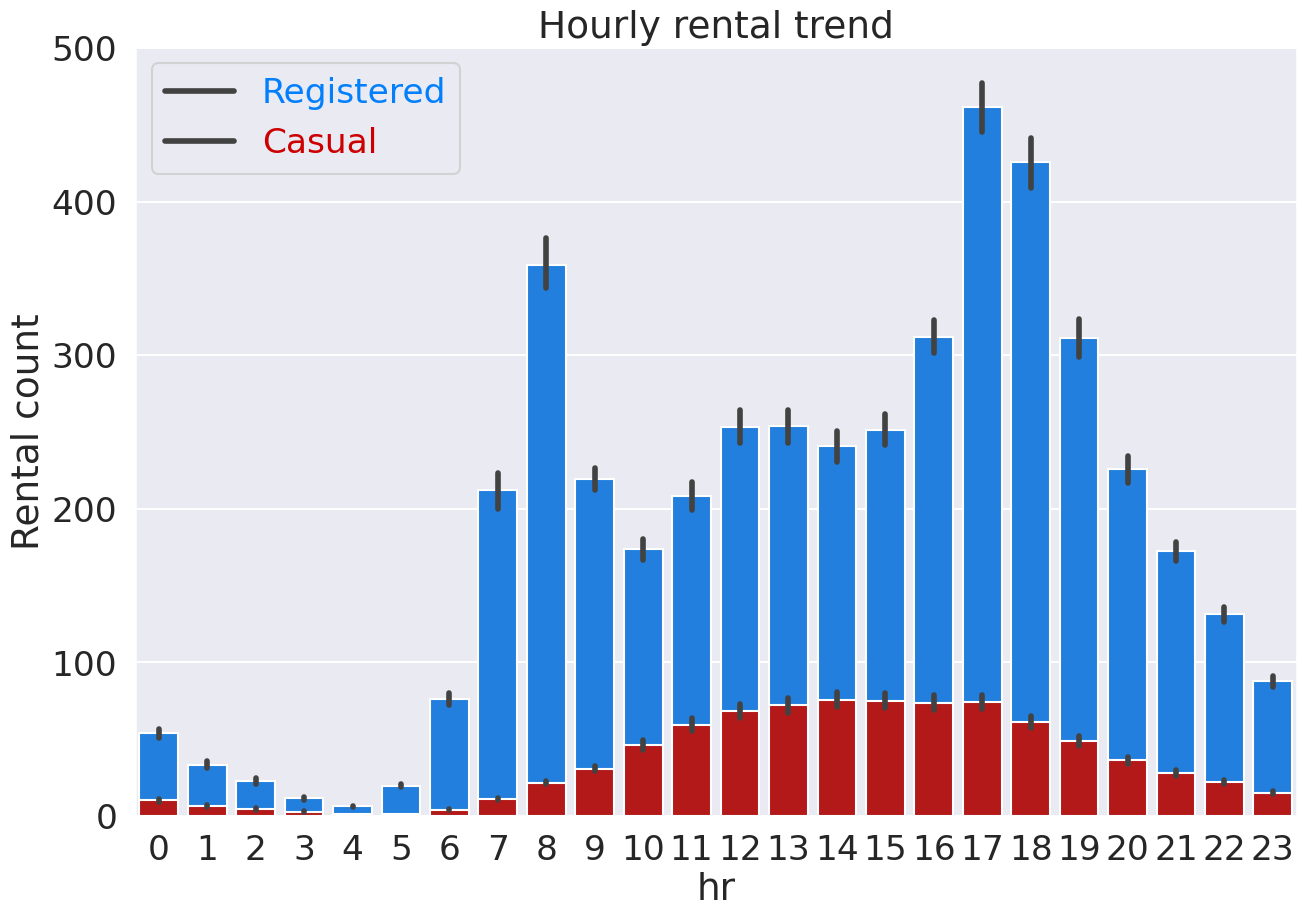

In [121]:
# plot hourly trend with seaborn
# increase seaborn plot size
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.5)

bar1 = sns.barplot(x="hr",  y="cnt", data=b.hour_ds, color=b.color_reg)
bar2 = sns.barplot(x="hr", y="casual", data=b.hour_ds,  color=b.color_cas)
# set the legend with colors
bar1.legend({'Registered': b.color_reg, 'Casual': b.color_cas}, loc='upper left')
bar2.legend_.get_texts()[0].set_color(b.color_reg)
bar2.legend_.get_texts()[1].set_color(b.color_cas)
#set y axis label
bar2.set_ylabel('Rental count')
bar2.set_title('Hourly rental trend')


Text(0.5, 1.0, 'Weekday rental trend')

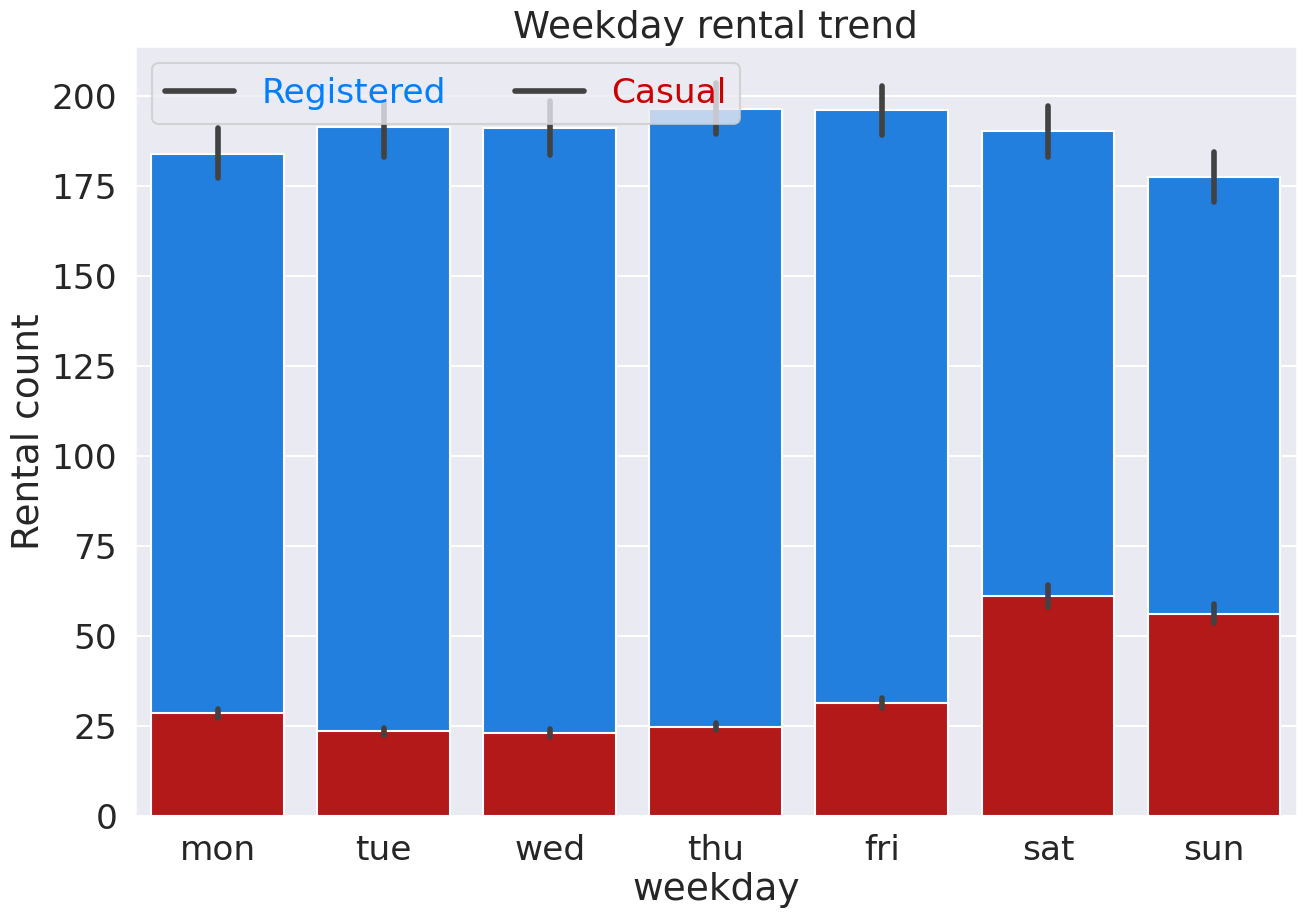

In [120]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.5)

bar1 = sns.barplot(x="weekday",  y="cnt", data=b.hour_ds, color=b.color_reg, order=b.weekday_order)
bar2 = sns.barplot(x="weekday", y="casual", data=b.hour_ds,  color=b.color_cas, order=b.weekday_order)

# set the legend with colors
bar2.legend(
    labels={'Registered': b.color_reg, 'Casual': b.color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
bar2.legend_.get_texts()[0].set_color(b.color_reg)
bar2.legend_.get_texts()[1].set_color(b.color_cas)
#set y axis label
bar2.set_ylabel('Rental count')
bar2.set_title('Weekday rental trend')

([<matplotlib.patches.Wedge at 0x7f4873f53820>,
 [Text(-0.5199442513844276, 0.9693595697429759, 'clear'),
  Text(0.25641761003473684, -1.069696222889505, 'mist'),
  Text(1.0637055636843, -0.28023289205063984, 'light_rain'),
  Text(1.0999998381886114, -0.0005966448096825092, 'heavy_rain')],
 [Text(-0.28360595530059685, 0.5287415834961686, '65.67%  (11413)'),
  Text(0.13986415092803828, -0.5834706670306391, '26.15%  (4544)'),
  Text(0.5802030347368908, -0.15285430475489442, '8.17%  (1419)'),
  Text(0.5999999117392425, -0.00032544262346318684, '0.02%  (3)')])

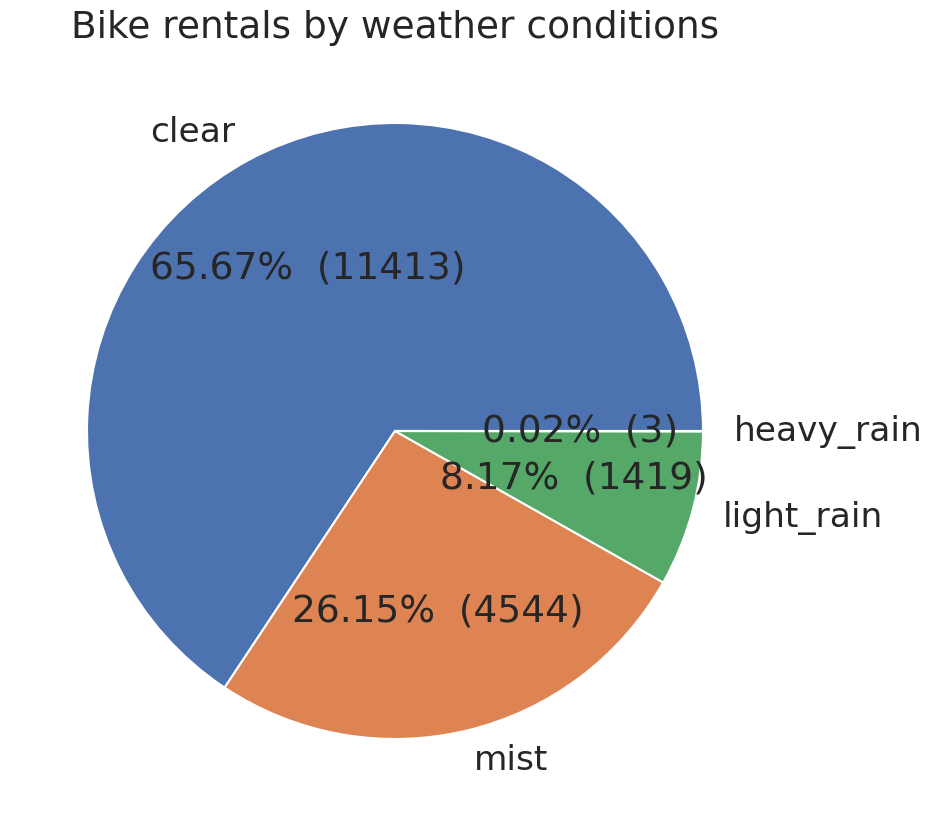

In [128]:

sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.5)

dt = [
    len(b.hour_ds[b.hour_ds['weathersit'] == 'clear']),
    len(b.hour_ds[b.hour_ds['weathersit'] == 'mist']),
    len(b.hour_ds[b.hour_ds['weathersit'] == 'light_rain']),
    len(b.hour_ds[b.hour_ds['weathersit'] == 'heavy_rain'])
]
labels = ['clear', 'mist', 'light_rain', 'heavy_rain']
colors = b.weather_color_palette

plt.title('Bike rentals by weather conditions')
plt.pie(dt, labels=labels, autopct=b.make_autopct(dt))


IndexError: list index out of range

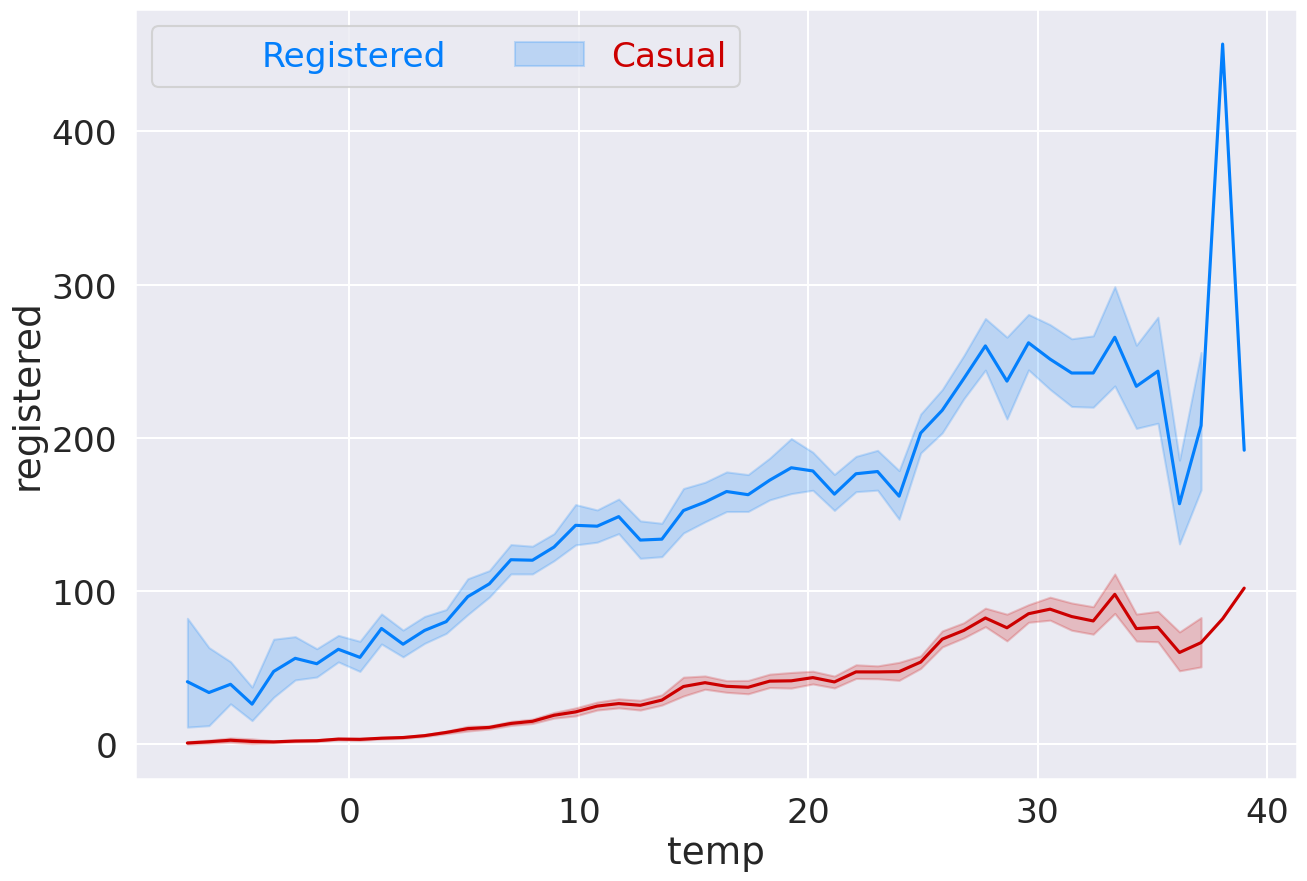

In [139]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context('talk', font_scale=1.5)




# lineplot by temperature
plt1 = sns.lineplot(x="temp", y="registered", data=b.hour_ds, color=b.color_reg)
plt2 = sns.lineplot(x="temp", y="casual", data=b.hour_ds, color=b.color_cas)

plt2.legend(
    labels={'Registered': b.color_reg, 'Casual': b.color_cas},
    loc='upper left',
    ncol=2
)
# set ber2 legend to specific colors
plt2.legend_.get_texts()[0].set_color(b.color_reg)
plt2.legend_.get_texts()[1].set_color(b.color_cas)

# remove lines from legend
plt2.legend_.get_lines()[0].set_linewidth(0)
plt2.legend_.get_lines()[1].set_color(b.color_cas)